In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")


Libraries imported successfully!


In [4]:
# Load the dataset
print("Loading the complaints dataset...")
df = pd.read_csv('../data/complaints.csv')
print(f"Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


Loading the complaints dataset...
Dataset loaded successfully!
Dataset shape: (9609797, 18)
Memory usage: 12668.98 MB


In [3]:
# Basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nColumn names:")
print(df.columns.tolist())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memo

In [4]:
# Display first few rows
print("First 5 rows:")
df.head()


First 5 rows:


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [5]:
# Check for missing values
print("Missing values in each column:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
}).sort_values('Missing Count', ascending=False)
print(missing_df[missing_df['Missing Count'] > 0])


Missing values in each column:
                              Missing Count  Missing Percentage
Tags                                8981029           93.457011
Consumer disputed?                  8841498           92.005044
Consumer complaint narrative        6629041           68.982113
Company public response             4770207           49.638999
Consumer consent provided?          1649561           17.165409
Sub-issue                            839522            8.736105
Sub-product                          235295            2.448491
State                                 54516            0.567296
ZIP code                              30228            0.314554
Company response to consumer             20            0.000208
Issue                                     6            0.000062


Product distribution:
Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                                                           86205
Ve

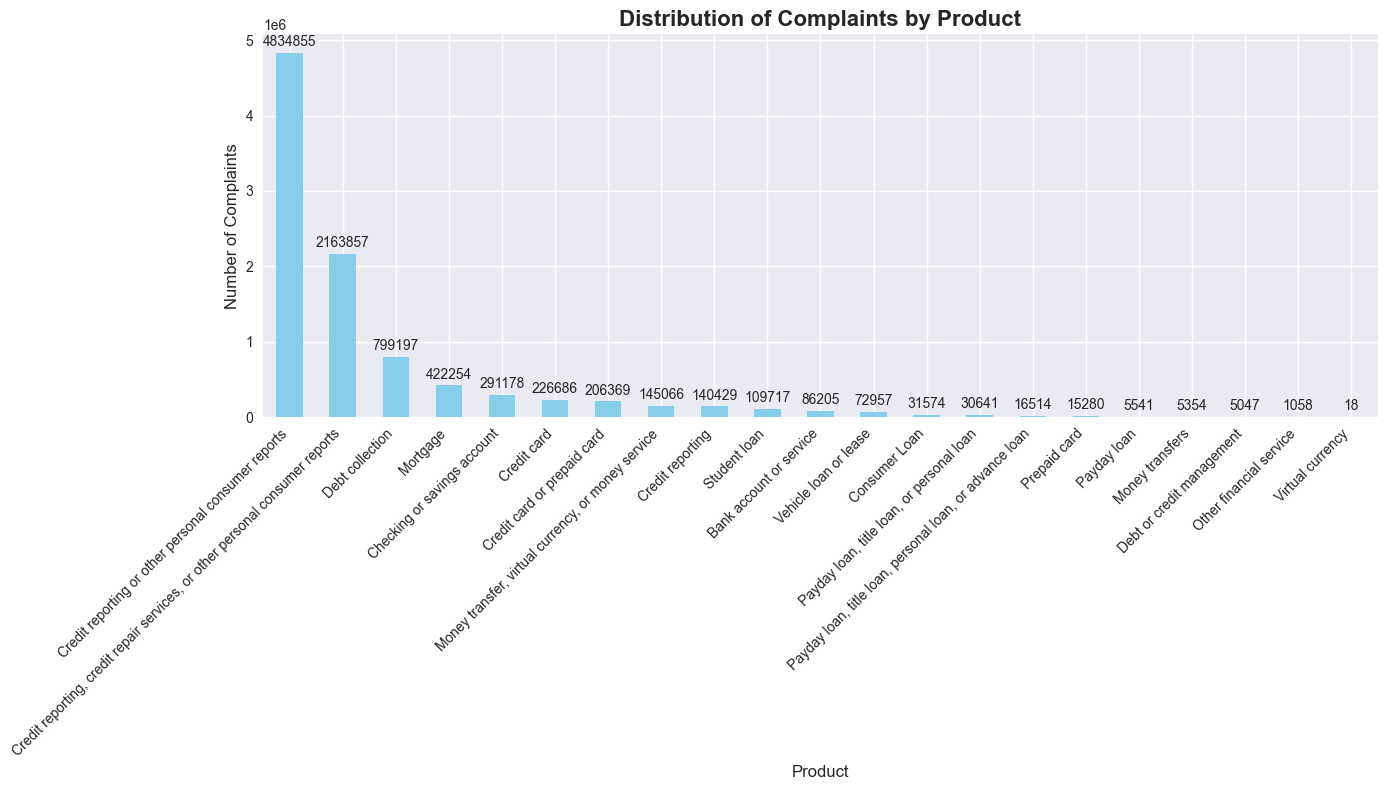

In [6]:
# Analyze product distribution
product_col = 'Product' if 'Product' in df.columns else 'product'
if product_col in df.columns:
    print("Product distribution:")
    product_counts = df[product_col].value_counts()
    print(product_counts)
    
    # Visualize product distribution
    plt.figure(figsize=(14, 8))
    ax = product_counts.plot(kind='bar', color='skyblue')
    plt.title('Distribution of Complaints by Product', fontsize=16, fontweight='bold')
    plt.xlabel('Product', fontsize=12)
    plt.ylabel('Number of Complaints', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Add value labels on bars
    for i, v in enumerate(product_counts.values):
        ax.text(i, v + max(product_counts.values) * 0.01, str(v), ha='center', va='bottom')
    
    plt.show()
else:
    print("Product column not found in the dataset")
    print("Available columns:", df.columns.tolist())


Found narrative column: 'Consumer complaint narrative'

Narrative Statistics:
Total complaints: 9,609,797
Complaints with narratives: 2,980,756 (31.0%)
Complaints without narratives: 6,629,041 (69.0%)


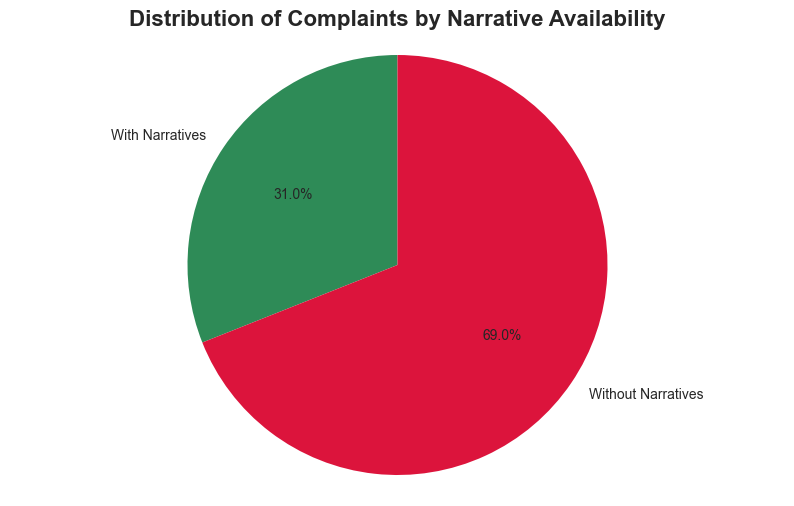

In [6]:
# Find the narrative column
narrative_col = None
possible_names = ['Consumer complaint narrative', 'consumer_complaint_narrative', 'narrative', 'Narrative']
for col in possible_names:
    if col in df.columns:
        narrative_col = col
        break

if narrative_col:
    print(f"Found narrative column: '{narrative_col}'")
    
    # Count complaints with and without narratives
    total_complaints = len(df)
    complaints_with_narratives = df[narrative_col].notna().sum()
    complaints_without_narratives = total_complaints - complaints_with_narratives
    
    print(f"\nNarrative Statistics:")
    print(f"Total complaints: {total_complaints:,}")
    print(f"Complaints with narratives: {complaints_with_narratives:,} ({complaints_with_narratives/total_complaints*100:.1f}%)")
    print(f"Complaints without narratives: {complaints_without_narratives:,} ({complaints_without_narratives/total_complaints*100:.1f}%)")
    
    # Visualize narrative availability
    plt.figure(figsize=(10, 6))
    labels = ['With Narratives', 'Without Narratives']
    sizes = [complaints_with_narratives, complaints_without_narratives]
    colors = ['#2E8B57', '#DC143C']
    
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title('Distribution of Complaints by Narrative Availability', fontsize=16, fontweight='bold')
    plt.axis('equal')
    plt.show()
else:
    print("Narrative column not found in the dataset")
    print("Available columns:", df.columns.tolist())


In [7]:
# OPTIMIZATION: Process only a sample first
sample_size = 50000  # Adjust this number
df_sample = df.sample(n=min(sample_size, len(df)), random_state=42)

# Use df_sample instead of df for the word count analysis
narratives_df = df_sample[df_sample[narrative_col].notna()].copy()

In [ ]:
# Analyze narrative word counts
if narrative_col:
    # Calculate word counts for non-null narratives
    narratives_df = df[df[narrative_col].notna()].copy()
    narratives_df['word_count'] = narratives_df[narrative_col].str.split().str.len()
    
    print("Word count statistics for narratives:")
    print(narratives_df['word_count'].describe())
    
    # Visualize word count distribution
    plt.figure(figsize=(15, 10))
    
    # Histogram
    plt.subplot(2, 2, 1)
    plt.hist(narratives_df['word_count'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Distribution of Word Counts in Narratives', fontweight='bold')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    
    # Box plot
    plt.subplot(2, 2, 2)
    plt.boxplot(narratives_df['word_count'])
    plt.title('Box Plot of Word Counts', fontweight='bold')
    plt.ylabel('Word Count')
    
    # Log scale histogram
    plt.subplot(2, 2, 3)
    plt.hist(narratives_df['word_count'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.yscale('log')
    plt.title('Distribution of Word Counts (Log Scale)', fontweight='bold')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency (Log Scale)')
    
    # Cumulative distribution
    plt.subplot(2, 2, 4)
    sorted_counts = np.sort(narratives_df['word_count'])
    cumulative = np.arange(1, len(sorted_counts) + 1) / len(sorted_counts)
    plt.plot(sorted_counts, cumulative, color='red', linewidth=2)
    plt.title('Cumulative Distribution of Word Counts', fontweight='bold')
    plt.xlabel('Word Count')
    plt.ylabel('Cumulative Probability')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Identify very short and very long narratives
    short_threshold = 10
    long_threshold = 500
    
    very_short = narratives_df[narratives_df['word_count'] <= short_threshold]
    very_long = narratives_df[narratives_df['word_count'] >= long_threshold]
    
    print(f"\nNarratives with <= {short_threshold} words: {len(very_short):,} ({len(very_short)/len(narratives_df)*100:.1f}%)")
    print(f"Narratives with >= {long_threshold} words: {len(very_long):,} ({len(very_long)/len(narratives_df)*100:.1f}%)")
    
    # Show examples of very short narratives
    print(f"\nExamples of very short narratives (<= {short_threshold} words):")
    for i, narrative in enumerate(very_short[narrative_col].head(5)):
        print(f"{i+1}. {narrative}")
    
    # Show examples of very long narratives (first 200 chars)
    print(f"\nExamples of very long narratives (>= {long_threshold} words, first 200 chars):")
    for i, narrative in enumerate(very_long[narrative_col].head(3)):
        print(f"{i+1}. {str(narrative)[:200]}...")


In [ ]:
# Define target products
target_products = [
    'Credit card',
    'Personal loan', 
    'Buy Now, Pay Later (BNPL)',
    'Savings account',
    'Money transfers'
]

print("Target products for CrediTrust Financial:")
for i, product in enumerate(target_products, 1):
    print(f"{i}. {product}")

# Check what products exist in the dataset
if product_col in df.columns:
    print(f"\nActual products in dataset:")
    actual_products = df[product_col].unique()
    for product in sorted(actual_products):
        if pd.isna(product):
            continue
        print(f"- {product}")
    
    # Try to match target products with actual products (case-insensitive)
    matched_products = []
    for target in target_products:
        # Look for exact matches or similar matches
        target_lower = target.lower()
        for actual in actual_products:
            if pd.isna(actual):
                continue
            actual_lower = str(actual).lower()
            if target_lower in actual_lower or actual_lower in target_lower:
                matched_products.append(actual)
                print(f"Matched '{target}' with '{actual}'")
                break
    
    print(f"\nMatched products: {len(matched_products)}")
    print(matched_products)
else:
    print("Product column not found for filtering")


In [ ]:
# Filter dataset based on target products and narrative availability
if product_col in df.columns and narrative_col and len(matched_products) > 0:
    print("Filtering dataset...")
    
    # Filter for target products
    filtered_df = df[df[product_col].isin(matched_products)].copy()
    print(f"After product filtering: {len(filtered_df):,} records")
    
    # Remove records with empty narratives
    filtered_df = filtered_df[filtered_df[narrative_col].notna()].copy()
    filtered_df = filtered_df[filtered_df[narrative_col].str.strip() != ''].copy()
    print(f"After removing empty narratives: {len(filtered_df):,} records")
    
    # Show distribution of filtered data
    print("\nProduct distribution in filtered dataset:")
    filtered_product_counts = filtered_df[product_col].value_counts()
    print(filtered_product_counts)
    
    # Visualize filtered product distribution
    plt.figure(figsize=(12, 8))
    ax = filtered_product_counts.plot(kind='bar', color='lightcoral')
    plt.title('Distribution of Complaints by Product (Filtered Dataset)', fontsize=16, fontweight='bold')
    plt.xlabel('Product', fontsize=12)
    plt.ylabel('Number of Complaints', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Add value labels on bars
    for i, v in enumerate(filtered_product_counts.values):
        ax.text(i, v + max(filtered_product_counts.values) * 0.01, str(v), ha='center', va='bottom')
    
    plt.show()
else:
    print("Cannot filter dataset - missing required columns or no matched products")
    if product_col in df.columns:
        filtered_df = df.copy()
    else:
        filtered_df = pd.DataFrame()


In [ ]:
def clean_narrative_text(text):
    """
    Clean narrative text for better embedding quality.
    
    Args:
        text (str): Raw narrative text
    
    Returns:
        str: Cleaned narrative text
    """
    if pd.isna(text) or text == '':
        return ''
    
    # Convert to string
    text = str(text)
    
    # Remove boilerplate text (common complaint opening phrases)
    boilerplate_patterns = [
        r'I am writing to file a complaint.*?about',
        r'I am filing this complaint.*?regarding',
        r'I would like to file a complaint.*?about',
        r'This is a complaint about.*?regarding',
        r'I am submitting this complaint.*?concerning'
    ]
    
    for pattern in boilerplate_patterns:
        text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    
    # Remove excessive whitespace and normalize
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with single space
    text = text.strip()
    
    # Remove special characters but keep basic punctuation
    text = re.sub(r'[^\w\s\.\,\!\?\-\$\%\:]', ' ', text)
    
    # Remove excessive punctuation
    text = re.sub(r'[\.\.\.\.\.\\.]+', '.', text)  # Multiple dots to single dot
    text = re.sub(r'[\!\!\!]+', '!', text)  # Multiple exclamation marks
    text = re.sub(r'[\?\?\?]+', '?', text)  # Multiple question marks
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove extra whitespace again
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Test the cleaning function
sample_text = "I am writing to file a complaint about my CREDIT CARD!!!! There are multiple    spaces and special characters @#$%^&*()_+{}|:<>?[];'\"\\\\,./ in this text."
cleaned_sample = clean_narrative_text(sample_text)
print("Original text:")
print(sample_text)
print("\nCleaned text:")
print(cleaned_sample)


In [ ]:
# Apply text cleaning to the filtered dataset
if narrative_col and len(filtered_df) > 0:
    print("Applying text cleaning to narratives...")
    
    # Show examples before cleaning
    print("\nExamples before cleaning:")
    for i, narrative in enumerate(filtered_df[narrative_col].head(3)):
        print(f"{i+1}. {str(narrative)[:200]}...")
    
    # Apply cleaning
    filtered_df['cleaned_narrative'] = filtered_df[narrative_col].apply(clean_narrative_text)
    
    # Show examples after cleaning
    print("\nExamples after cleaning:")
    for i, narrative in enumerate(filtered_df['cleaned_narrative'].head(3)):
        print(f"{i+1}. {str(narrative)[:200]}...")
    
    # Remove empty narratives after cleaning
    initial_count = len(filtered_df)
    filtered_df = filtered_df[filtered_df['cleaned_narrative'].str.strip() != ''].copy()
    final_count = len(filtered_df)
    
    print(f"\nRecords removed due to empty narratives after cleaning: {initial_count - final_count}")
    print(f"Final dataset size: {final_count:,} records")
    
    # Calculate word count statistics after cleaning
    filtered_df['cleaned_word_count'] = filtered_df['cleaned_narrative'].str.split().str.len()
    
    print("\nWord count statistics after cleaning:")
    print(filtered_df['cleaned_word_count'].describe())
else:
    print("Cannot apply text cleaning - missing narrative column or empty dataset")


In [ ]:
# Save the processed dataset
if len(filtered_df) > 0:
    # Select relevant columns for the RAG pipeline
    columns_to_keep = []
    
    # Add essential columns
    if product_col in filtered_df.columns:
        columns_to_keep.append(product_col)
    
    if narrative_col in filtered_df.columns:
        columns_to_keep.append(narrative_col)
    
    if 'cleaned_narrative' in filtered_df.columns:
        columns_to_keep.append('cleaned_narrative')
    
    # Add other useful columns if they exist
    potential_columns = [
        'Date received', 'date_received', 'Date',
        'Issue', 'issue',
        'Sub-issue', 'sub_issue',
        'Company', 'company',
        'State', 'state',
        'Complaint ID', 'complaint_id', 'id'
    ]
    
    for col in potential_columns:
        if col in filtered_df.columns:
            columns_to_keep.append(col)
    
    # Remove duplicates and select available columns
    columns_to_keep = list(set(columns_to_keep))
    available_columns = [col for col in columns_to_keep if col in filtered_df.columns]
    
    final_df = filtered_df[available_columns].copy()
    
    # Save to CSV
    output_path = '../data/filtered_complaints.csv'
    final_df.to_csv(output_path, index=False)
    print(f"Processed dataset saved to: {output_path}")
    print(f"Final dataset shape: {final_df.shape}")
    print(f"Columns: {final_df.columns.tolist()}")
    
    # Verify the saved file
    verification_df = pd.read_csv(output_path)
    print(f"\nVerification - loaded {len(verification_df):,} records from saved file")
    
    # Show sample of final dataset
    print("\nSample of final dataset:")
    print(final_df.head())
    
else:
    print("No data to save - final dataset is empty")


In [ ]:
# Generate comprehensive EDA summary
print("=" * 60)
print("EXPLORATORY DATA ANALYSIS SUMMARY")
print("=" * 60)

if len(df) > 0:
    print(f"\n1. DATASET OVERVIEW:")
    print(f"   - Original dataset size: {len(df):,} records")
    print(f"   - Total columns: {len(df.columns)}")
    print(f"   - Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
    
    if narrative_col:
        narratives_with_data = df[df[narrative_col].notna()]
        print(f"\n2. NARRATIVE ANALYSIS:")
        print(f"   - Records with narratives: {len(narratives_with_data):,} ({len(narratives_with_data)/len(df)*100:.1f}%)")
        print(f"   - Records without narratives: {len(df) - len(narratives_with_data):,} ({(len(df) - len(narratives_with_data))/len(df)*100:.1f}%)")
        
        if len(narratives_with_data) > 0:
            word_counts = narratives_with_data[narrative_col].str.split().str.len()
            print(f"   - Average narrative length: {word_counts.mean():.1f} words")
            print(f"   - Median narrative length: {word_counts.median():.1f} words")
            print(f"   - Shortest narrative: {word_counts.min()} words")
            print(f"   - Longest narrative: {word_counts.max()} words")
    
    if product_col in df.columns:
        print(f"\n3. PRODUCT ANALYSIS:")
        product_counts = df[product_col].value_counts()
        print(f"   - Total unique products: {len(product_counts)}")
        print(f"   - Top 3 products by complaint volume:")
        for i, (product, count) in enumerate(product_counts.head(3).items()):
            print(f"     {i+1}. {product}: {count:,} complaints")
    
    if 'filtered_df' in locals() and len(filtered_df) > 0:
        print(f"\n4. FILTERED DATASET (FOR RAG PIPELINE):")
        print(f"   - Final dataset size: {len(filtered_df):,} records")
        print(f"   - Data reduction: {(1 - len(filtered_df)/len(df))*100:.1f}% of original data removed")
        print(f"   - Target products included: {len(matched_products) if 'matched_products' in locals() else 'N/A'}")
        
        if 'cleaned_word_count' in filtered_df.columns:
            print(f"   - Average cleaned narrative length: {filtered_df['cleaned_word_count'].mean():.1f} words")
            print(f"   - Median cleaned narrative length: {filtered_df['cleaned_word_count'].median():.1f} words")
    
    print(f"\n5. DATA QUALITY INSIGHTS:")
    if narrative_col:
        narratives_with_data = df[df[narrative_col].notna()]
        if len(narratives_with_data) > 0:
            short_narratives = len(narratives_with_data[narratives_with_data[narrative_col].str.split().str.len() <= 10])
            long_narratives = len(narratives_with_data[narratives_with_data[narrative_col].str.split().str.len() >= 500])
            print(f"   - Very short narratives (≤10 words): {short_narratives:,} ({short_narratives/len(narratives_with_data)*100:.1f}%)")
            print(f"   - Very long narratives (≥500 words): {long_narratives:,} ({long_narratives/len(narratives_with_data)*100:.1f}%)")
    
    missing_data = df.isnull().sum().sum()
    total_cells = len(df) * len(df.columns)
    print(f"   - Overall missing data: {missing_data:,} cells ({missing_data/total_cells*100:.1f}% of all data)")
    
    print(f"\n6. RECOMMENDATIONS FOR RAG PIPELINE:")
    print(f"   - Dataset is ready for embedding generation")
    print(f"   - Text cleaning successfully applied")
    print(f"   - Product filtering completed for target domains")
    print(f"   - Consider chunking very long narratives for better embedding quality")
    print(f"   - Implement semantic search on cleaned narratives for optimal retrieval")

print("\n" + "=" * 60)
print("EDA COMPLETED SUCCESSFULLY")
print("=" * 60)
